In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import torchvision, torch

In [3]:
import sys, os
sys.path.insert(0,"../torchxrayvision/")
import torchxrayvision as xrv
import matplotlib.pyplot as plt
import torch
from torch.nn import functional as F
import glob
import numpy as np
import skimage, skimage.filters
%matplotlib inline
import captum, captum.attr
import torch, torch.nn
import pickle
import attribution
import pandas as pd
import datasets
import shutil
import json
import glob

In [4]:
dmerge = datasets.get_data("nih")

NIH_Dataset num_samples=67310 views=['PA'] data_aug=None


In [5]:
dmerge

{'Atelectasis': {0.0: 61582, 1.0: 5728},
 'Cardiomegaly': {0.0: 65747, 1.0: 1563},
 'Consolidation': {0.0: 65789, 1.0: 1521},
 'Edema': {0.0: 67034, 1.0: 276},
 'Effusion': {0.0: 60721, 1.0: 6589},
 'Emphysema': {0.0: 65811, 1.0: 1499},
 'Fibrosis': {0.0: 65902, 1.0: 1408},
 'Hernia': {0.0: 67118, 1.0: 192},
 'Infiltration': {0.0: 57957, 1.0: 9353},
 'Mass': {0.0: 63743, 1.0: 3567},
 'Nodule': {0.0: 63133, 1.0: 4177},
 'Pleural_Thickening': {0.0: 64892, 1.0: 2418},
 'Pneumonia': {0.0: 66680, 1.0: 630},
 'Pneumothorax': {0.0: 63903, 1.0: 3407}}


NIH_Dataset num_samples=67310 views=['PA'] data_aug=None

In [6]:
ae = xrv.autoencoders.ResNetAE(weights="101-elastic").cuda()

In [7]:
models = [xrv.models.DenseNet(weights="all").cuda(),
          xrv.baseline_models.jfhealthcare.DenseNet().cuda()]

In [8]:
model = models[0]
print(model.pathologies)
print(model)

['Atelectasis', 'Consolidation', 'Infiltration', 'Pneumothorax', 'Edema', 'Emphysema', 'Fibrosis', 'Effusion', 'Pneumonia', 'Pleural_Thickening', 'Cardiomegaly', 'Nodule', 'Mass', 'Hernia', 'Lung Lesion', 'Fracture', 'Lung Opacity', 'Enlarged Cardiomediastinum']
XRV-DenseNet121-all


In [9]:
for_eval = [
            "Cardiomegaly",
            "Atelectasis",
            "Effusion",
            "Consolidation",
            "Edema",
            "Mass"
            ]

In [10]:
model.pathologies

['Atelectasis',
 'Consolidation',
 'Infiltration',
 'Pneumothorax',
 'Edema',
 'Emphysema',
 'Fibrosis',
 'Effusion',
 'Pneumonia',
 'Pleural_Thickening',
 'Cardiomegaly',
 'Nodule',
 'Mass',
 'Hernia',
 'Lung Lesion',
 'Fracture',
 'Lung Opacity',
 'Enlarged Cardiomediastinum']

In [11]:
for_eval

['Cardiomegaly', 'Atelectasis', 'Effusion', 'Consolidation', 'Edema', 'Mass']

In [12]:
methods = ["image", "grad", "guided", "integrated", "latentshift-max"]
temp_path = "/lscratch/joecohen/SDS-2342-ASDAA"

tensor([0.5100])
[0.44826764] -50 1


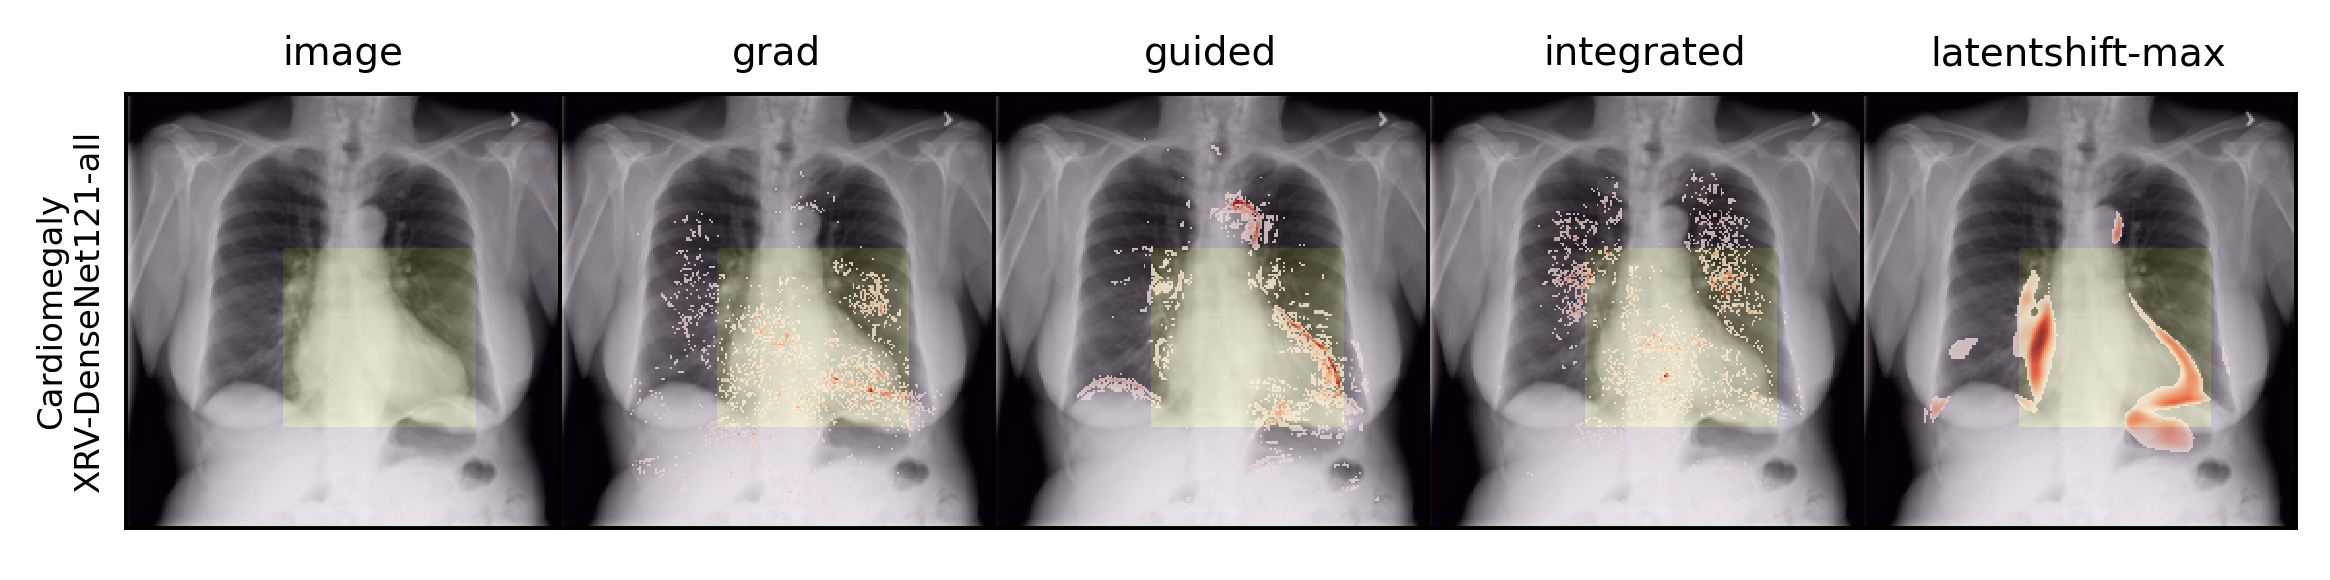

In [13]:
target = "Cardiomegaly"
label = 1
dwhere = np.where(dmerge.csv.has_masks & (dmerge.labels[:,dmerge.pathologies.index(target)]  == 1))[0]
idx = 5
sample = dmerge[dwhere[idx]]
model = models[0]
attribution.generate_attributions(sample, model, target, ae, temp_path, dmerge)

tensor([0.7834])
[0.47765264] -120 6


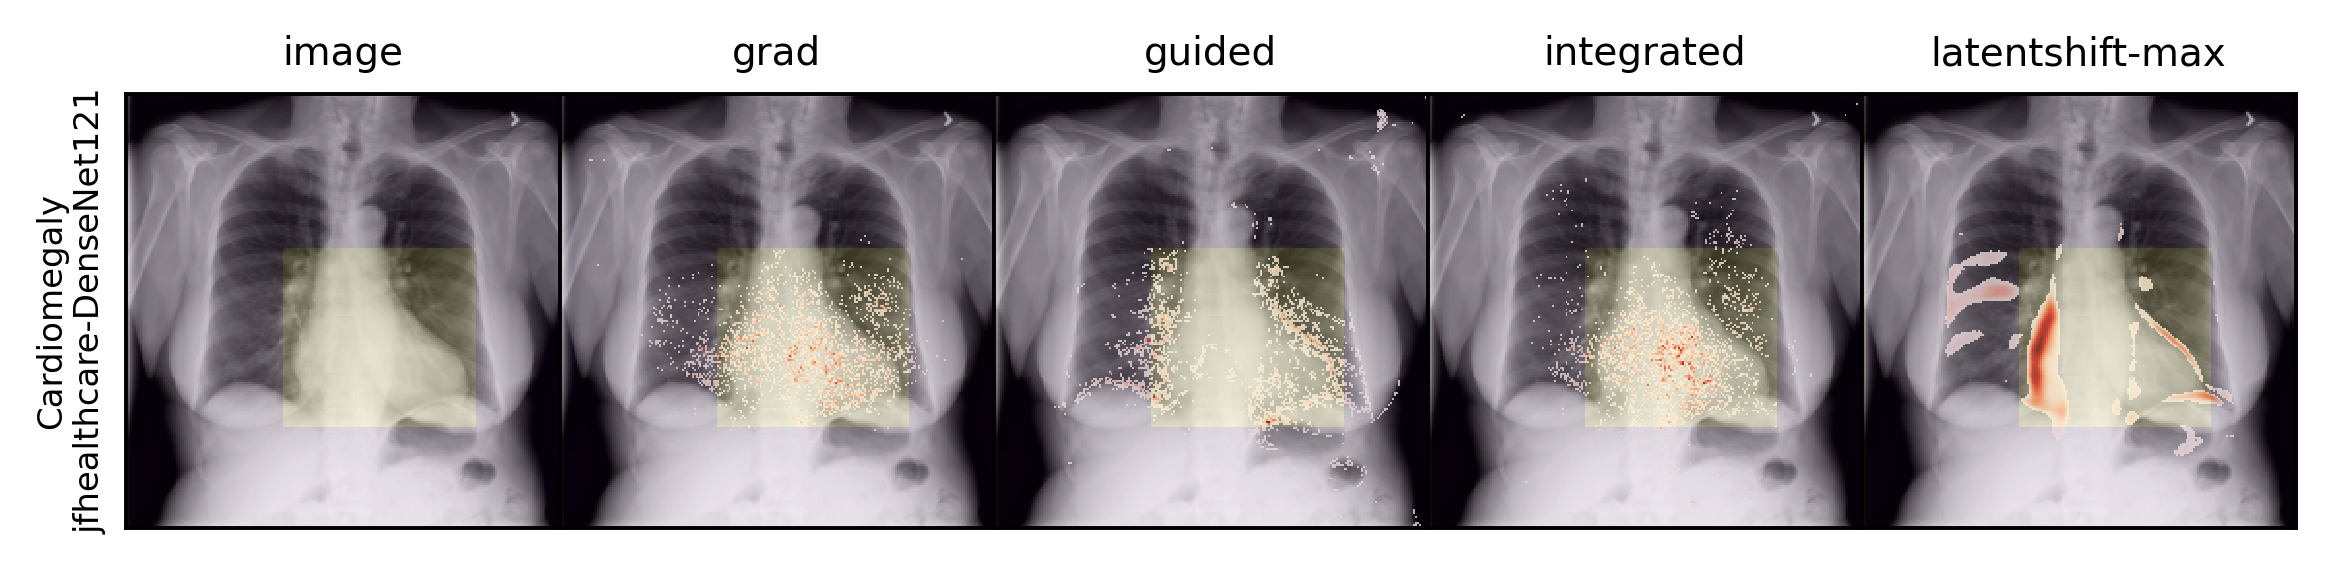

In [14]:
target = "Cardiomegaly"
label = 1
dwhere = np.where(dmerge.csv.has_masks & (dmerge.labels[:,dmerge.pathologies.index(target)]  == 1))[0]
idx = 5
sample = dmerge[dwhere[idx]]
model = models[1]
attribution.generate_attributions(sample, model, target, ae, temp_path, dmerge)

tensor([0.8052])
[0.5680183] -70 4


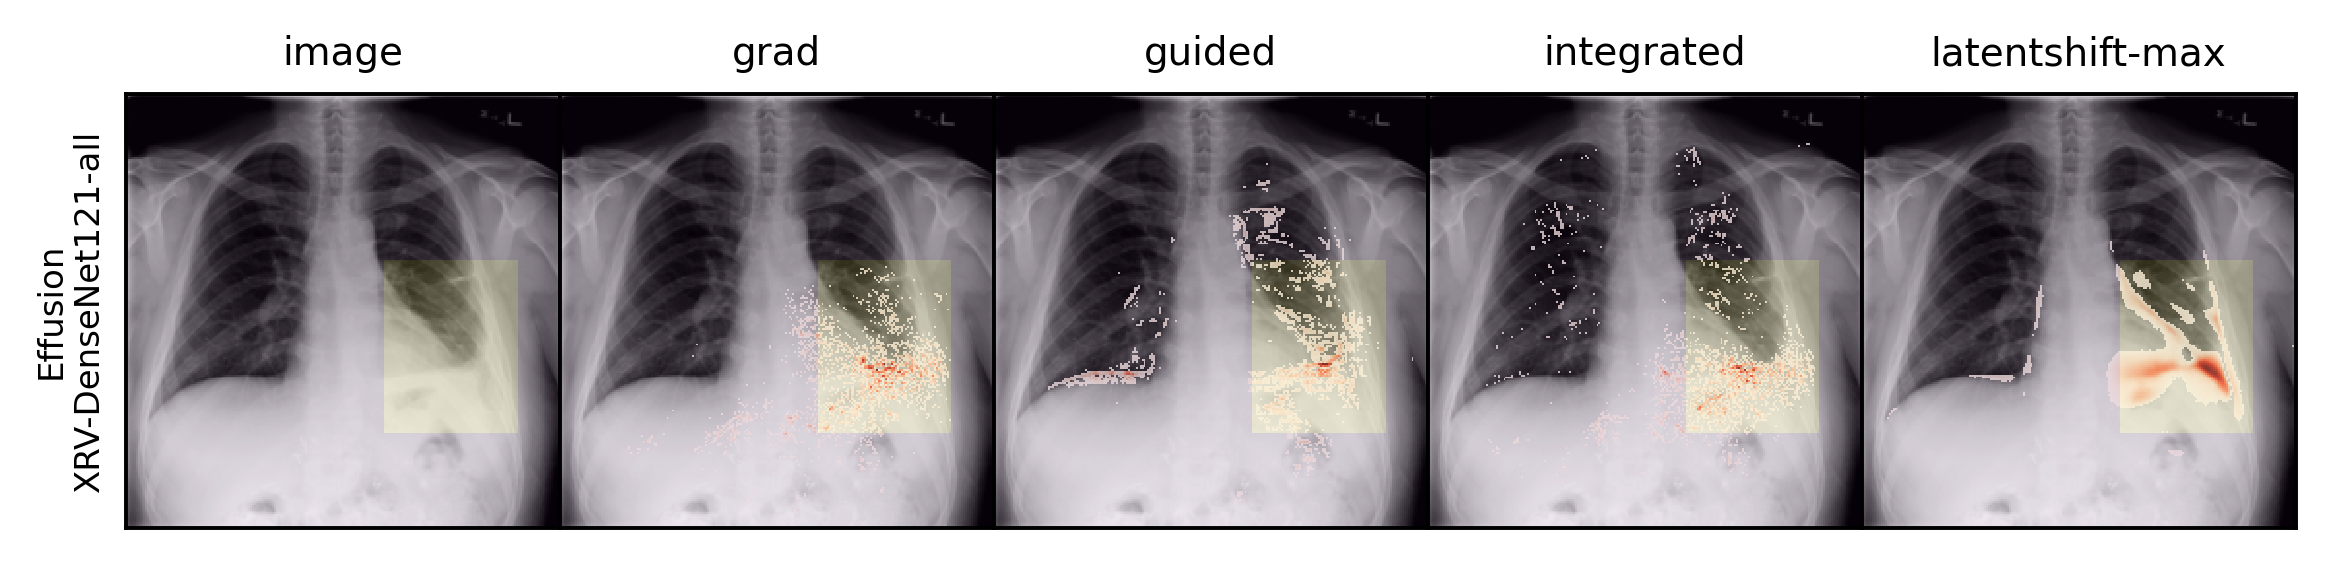

In [15]:
target = "Effusion"
label = 1
dwhere = np.where(dmerge.csv.has_masks & (dmerge.labels[:,dmerge.pathologies.index(target)]  == 1))[0]
idx = 8
sample = dmerge[dwhere[idx]]
model = models[0]
attribution.generate_attributions(sample, model, target, ae, temp_path, dmerge)

tensor([0.8102])
[0.40092975] -50 2


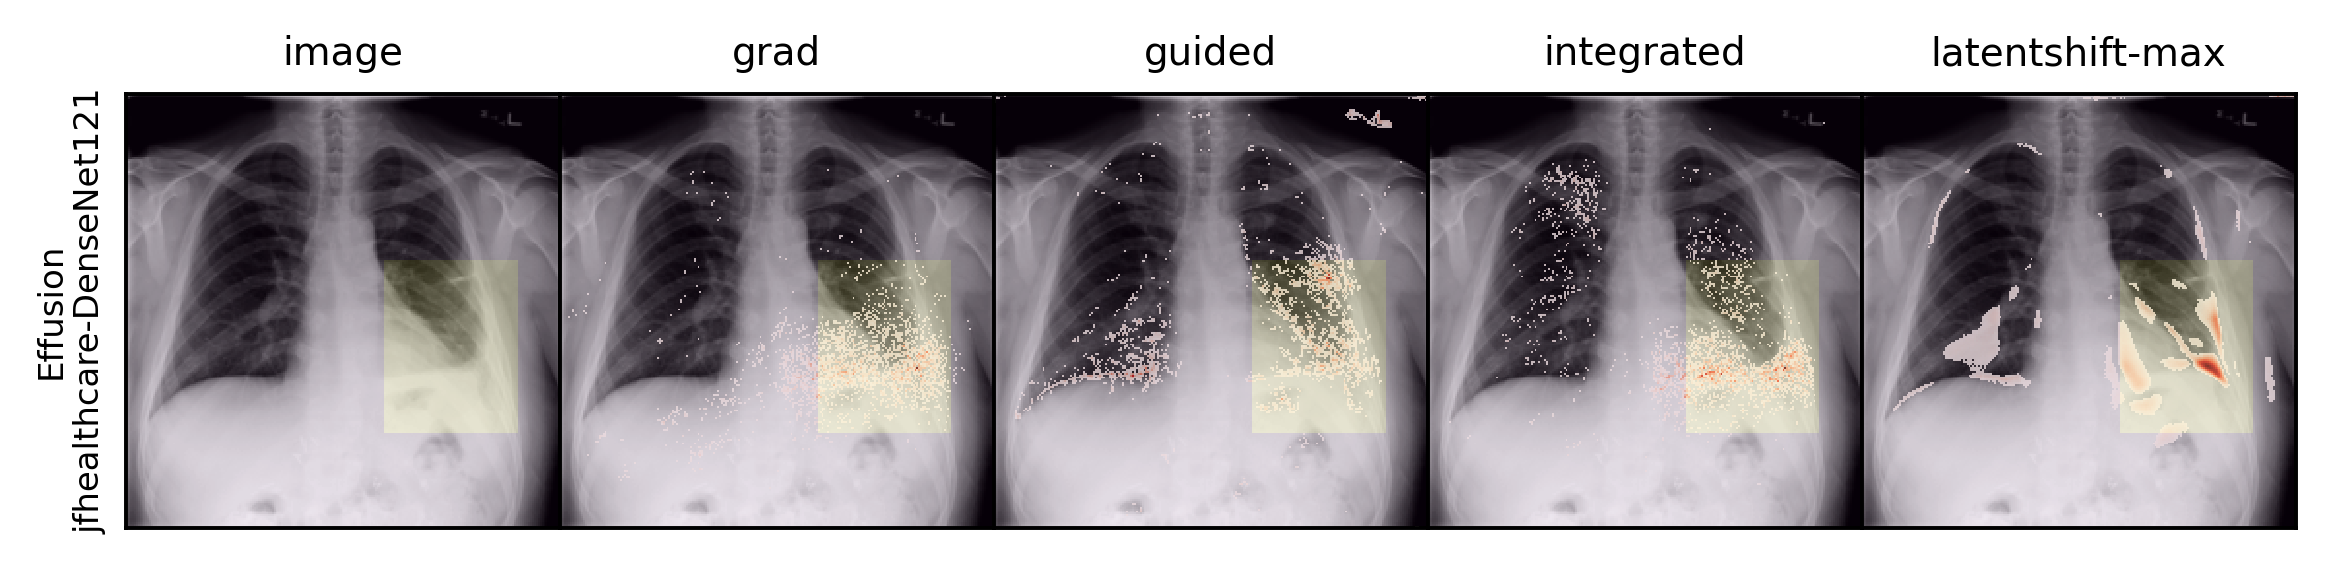

In [16]:
target = "Effusion"
label = 1
dwhere = np.where(dmerge.csv.has_masks & (dmerge.labels[:,dmerge.pathologies.index(target)]  == 1))[0]
idx = 8
sample = dmerge[dwhere[idx]]
model = models[1]
attribution.generate_attributions(sample, model, target, ae, temp_path, dmerge)